Nejprve načteme potřebné knihovny a námi vytvořené funkce

In [1]:
__author__ = 'Ondřej Lanč'

import matplotlib.pyplot as plt
from world.world import World

Zavedeme potřebné promněnné 

In [2]:
count_of_cities = 10
upper_bound = 1000
city_seed = 3
world=World()
world.random_world(count_of_cities, upper_bound, upper_bound, city_seed)

Vygenrujeme rozmístění měst v ploše

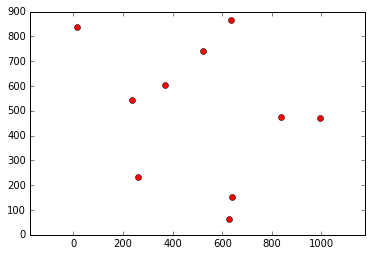

In [3]:
get_ipython().magic('matplotlib inline')
world.plot()
plt.show()

Přesné řešení
---------------
Nejprve uděláme pro kontrolu všechny permutace a vybereme nejlepší

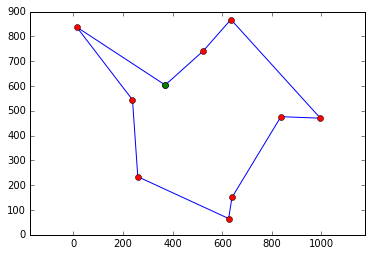

Nejkratší cesta je dlouhá 3047.9974140605295


In [4]:
from solver.brute import brute
route=brute(world)
world.plot(route, route[0])
plt.show()
distance=route.length()
print("Nejkratší cesta je dlouhá {}".format(distance))

Hladový algoritmus - nejbližší soused
------------------------------------
Začínáme v pevně určeném městě a pokračujem vždy do nejbližšího souseda. Nakonci poté uzavřeme cyklus. Proces opakujeme se startem v každém měste a vybíráme nejkratší celkovou cestu.

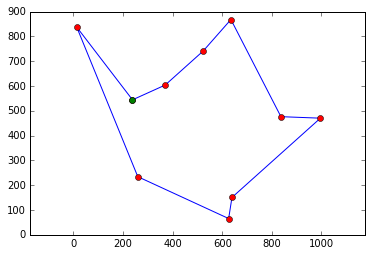

Nejkratší cesta je dlouhá 3108.7396987356874


In [4]:
from solver.greedy import greedy_all
route=greedy_all(world)
world.plot(route, route[0])
plt.show()
distance=route.length()
print("Nejkratší cesta je dlouhá {}".format(distance))

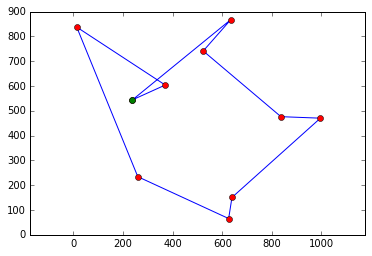

Nejkratší cesta je dlouhá 3441.8843549336116


In [5]:
from solver.ACO.colony import Colony
colony = Colony(world, 5000)
route=colony.solve()
world.plot(route, route[0])
plt.show()
distance=route.length()
print("Nejkratší cesta je dlouhá {}".format(distance))

0.000182862580999


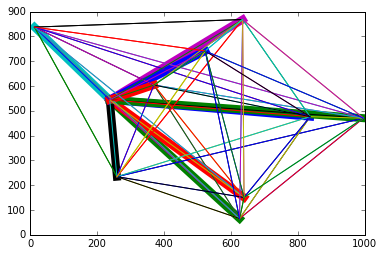

In [6]:
pher_min=min([path.pher for path in world.paths])
print(pher_min)
for path in world.paths:
    plt.plot([path.start.x, path.finish.x], [path.start.y, path.finish.y], linewidth=(path.pher/pher_min)**3)
plt.show()